In [ ]:
# NPS comment analysis using NLTK
# Author: Eric G. Suchanek, PhD
# (c) 2022 BestBuy, All Rights Reserved
# Confidential, do not share


### Using Natural Language Processing to better understand NPS Survey Results

In [1]:
import pandas as pd
import numpy as np
import re

#TextBlob Features
from textblob import TextBlob

#Plotting
import matplotlib_inline
import matplotlib.pyplot as plt

#nltk
import nltk

from collections import Counter
import bby
import numpy as np

In [2]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Word frequency distributions
def nps_freqs(stringlist, howmany=0):
    Vocab_str = str()
    Vocab_str = " ".join(str(review).lower() for review in stringlist)

    docSplit = Vocab_str.split()
    freq = nltk.FreqDist(w for w in docSplit)
    return freq

def update_vocab(vocab, new_words):
    vocab.update(new_words)
    return

def make_vocab(_vocab, sent):
    vocab = _vocab
    word_tokens = word_tokenize(sent)
    for w in word_tokens:
        if (len(w) > 1):
            vocab.update(w)
    return vocab

def build_vocabulary(sent_list):
    vocab = set()
    for sent in sent_list:
        vocab = make_vocab(vocab, sent)
    return vocab

def make_vocab_strings(stringlist):
    Vocab_str = str()
    Vocab_str = " ".join(str(comment).lower() for comment in stringlist)
    return Vocab_str


Read file ../data/clean/NPS_NATL_cleaned.csv containing a total of 126656 records.
Promoters: 108854, Passives: 7785, Detractors: 10017


<BarContainer object of 3 artists>

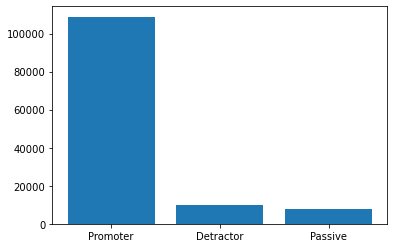

In [3]:
# National NPS extract processed by CleanNPS_National.py - this cleans and lemmatises the NPS and Overall
# comments. The full extract has not been equalized for comment distribution
# 

input_filename = "../data/clean/NPS_NATL_cleaned.csv"
#input_filename = "../data/clean/NPS_USO_cleaned.csv"
NPS_df = pd.read_csv(input_filename)

prom_list_mask = NPS_df['NPS_Code'] == 2
pass_list_mask = NPS_df['NPS_Code'] == 1
det_list_mask = NPS_df['NPS_Code'] == 0

prom_df = NPS_df[prom_list_mask].copy()
pass_df = NPS_df[pass_list_mask].copy()
det_df = NPS_df[det_list_mask].copy()

prom_df_len = prom_df.shape[0]
pass_df_len = pass_df.shape[0]
det_df_len = det_df.shape[0]

print(f'Read file {input_filename} containing a total of {NPS_df.shape[0]} records.')
print (f'Promoters: {prom_df_len}, Passives: {pass_df_len}, Detractors: {det_df_len}')

# Check the sentiment distribution

sentiments = list(NPS_df["NPS® Breakdown"].unique())
sentiment_nums = [len(NPS_df[NPS_df["NPS® Breakdown"] == sentiment]) for sentiment in sentiments]

plt.bar(sentiments, sentiment_nums)

In [4]:
#
# Build vocabularies for the different classes.
#
#stop_words = set(stopwords.words('english'))
from bby.util import nps_remove_stopwords

# I know that the following words are common across all classes so we strip them out in order to
# unbias the results
# GS_stopwords = ['geek', 'squad', 'service', 'customer', 'xyxyxz','\`', '\'']

print('Removing GS stopwords from promoters.')
prom_df['NPSCommentCleaned'] = prom_df['NPSCommentCleaned'].apply(nps_remove_stopwords)

print('Removing GS stopwords from passives.')
pass_df['NPSCommentCleaned'] = pass_df['NPSCommentCleaned'].apply(nps_remove_stopwords)

print('Removing GS stopwords from detractors.')
det_df['NPSCommentCleaned'] = det_df['NPSCommentCleaned'].apply(nps_remove_stopwords)

# write the cleaned promoters, passives and detractors to individual files
prom_df.to_csv('../data/clean/prom_list.csv', index=False)
pass_df.to_csv('../data/clean/pass_list.csv', index=False)
det_df.to_csv('../data/clean/det_list.csv', index=False)



Removing GS stopwords from promoters.
Removing GS stopwords from passives.
Removing GS stopwords from detractors.


In [5]:
prom_list_strings = prom_df['NPSCommentCleaned'].values.tolist()
pass_list_strings = pass_df['NPSCommentCleaned'].values.tolist()
det_list_strings = det_df['NPSCommentCleaned'].values.tolist()

print('Building Promoter vocabulary')
prom_strings = make_vocab_strings(prom_list_strings)
prom_vocab = build_vocabulary(prom_strings)

print('Building Passive vocabulary')
pass_strings = make_vocab_strings(pass_list_strings)
pass_vocab = build_vocabulary(pass_strings)

print('Building Detractor vocabulary')
det_strings = make_vocab_strings(det_list_strings)
det_vocab = build_vocabulary(det_strings)


Building Promoter vocabulary
Building Passive vocabulary
Building Detractor vocabulary


In [6]:
prom_strings = make_vocab_strings(prom_list_strings)
print(len(prom_strings))


4425755


In [7]:
prom_strings = " ".join(prom_list_strings)
print(len(prom_strings))


4425755


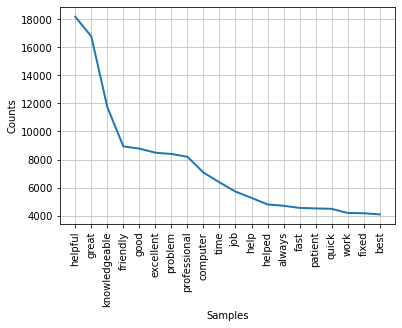

In [8]:
# Promoters only
Freqs_prom = nps_freqs(prom_list_strings)
#Freqs_prom = nps_freqs(prom_strings)

Freqs_prom.plot(20)
topWords_prom = Freqs_prom.most_common(10)

# Freqs_prom.tabulate(20)

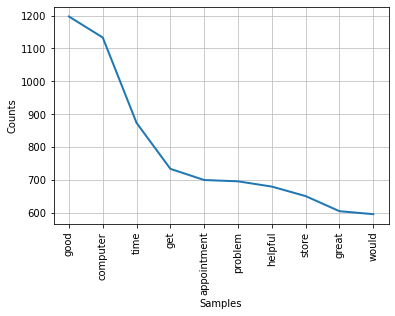

In [9]:
# Passives only
Freqs_pass = nps_freqs(pass_list_strings)
Freqs_pass.plot(10)
topWords_pass = Freqs_pass.most_common(20)

# Freqs_pass.tabulate(20)

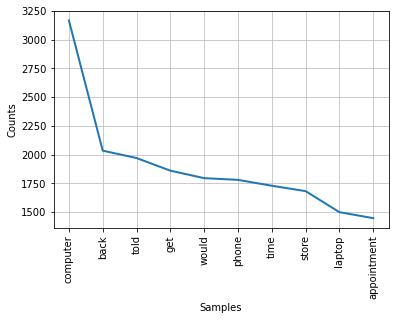

In [10]:
# Detractors only
Freqs_det = nps_freqs(det_list_strings)
Freqs_det.plot(10)
topWords_det = Freqs_det.most_common(25)

#Freqs_det.tabulate(50)


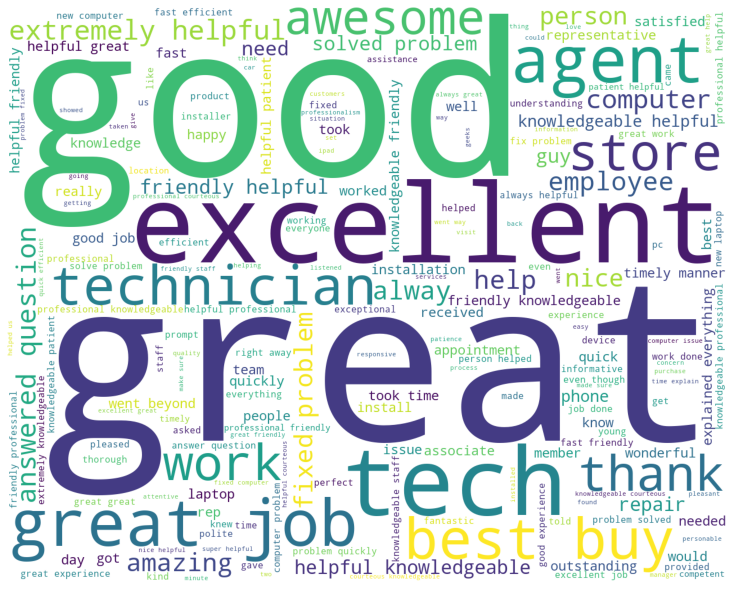

In [11]:
from PIL import Image
from wordcloud import WordCloud
import numpy as np
GS_stopwords = ['geek', 'squad', 'service', 'customer', 'xyxyxz','\`', '\'']

stop_GS = Counter(stopwords.words())
stop_GS.update(GS_stopwords)

#im = Image.open("promoters1.png")
#bg_pic = np.asarray(im)


wordcloud_prom = WordCloud(width = 1280, height = 1024,
                #mask=bg_pic,
                background_color ='white',
                contour_color='black',
                contour_width=1,
                stopwords = stop_GS,
                collocations=True,
                min_font_size = 4).generate(prom_strings)
wordcloud_prom.to_file('../img/promoters_uso.png')
 
# plot the WordCloud image                      
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud_prom)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


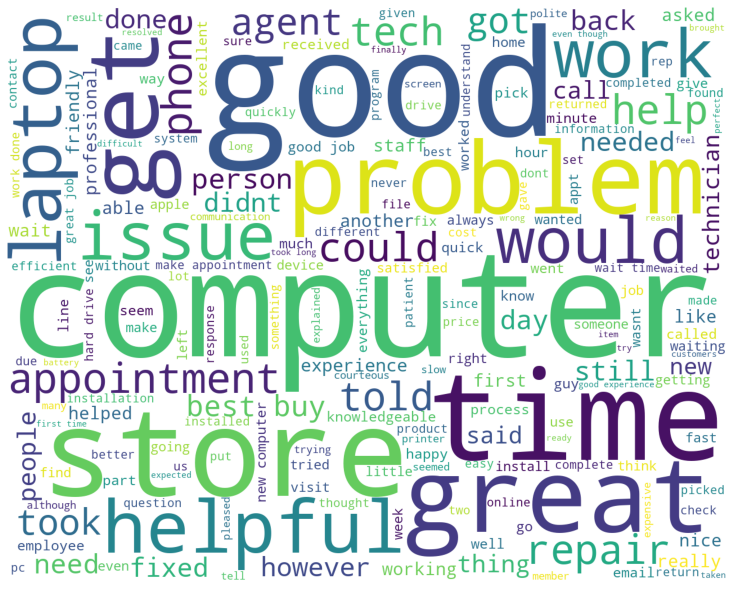

In [12]:
wordcloud_pass = WordCloud(width = 1280, height = 1024,
                background_color ='white',
                stopwords = stop_GS,
                collocations=True,
                min_font_size = 4).generate(pass_strings)

wordcloud_pass.to_file('../img/passive_uso.png')

# plot the WordCloud image                      
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud_pass)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


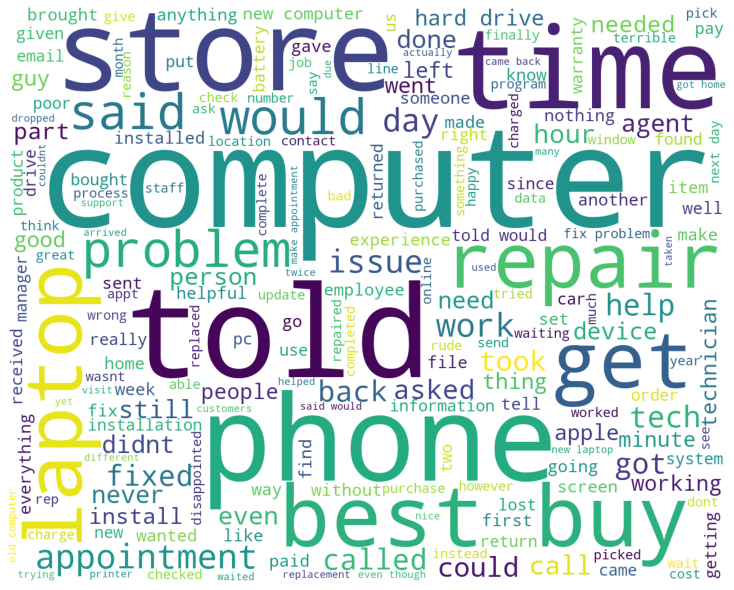

In [13]:
wordcloud_det = WordCloud(width = 1280, height = 1024,
                background_color ='white',
                stopwords = stop_GS,
                collocations=True,
                min_font_size = 4).generate(det_strings)
wordcloud_det.to_file('../img/detractors_uso.png')

 
# plot the WordCloud image                      
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud_det)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [14]:
# Look at Bigrams across Promoters/Passives/Detractors

from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder, QuadgramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures, QuadgramAssocMeasures
from nltk.corpus import stopwords

bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
fourgram_measures = nltk.collocations.QuadgramAssocMeasures()

topnumb = 15
stopset = set(stopwords.words('english'))
stopset.update(['best', 'buy', 'geek', 'squad', 'customer', 'service', 'xyxyxz','\'', 'computer'])
filter_stops = lambda w: len(w) < 2 or w in stopset

words = " ".join(str(comment).lower() for comment in prom_df.NPSCommentCleaned)
# wt = word_tokenize(words)
wt = nltk.wordpunct_tokenize(words)

# bigrams - promoters
bcf_prom = BigramCollocationFinder.from_words(wt)
bcf_prom.apply_word_filter(filter_stops)
bigrams_proms = bcf_prom.nbest(BigramAssocMeasures.likelihood_ratio, topnumb)
scored_bigrams_proms = bcf_prom.score_ngrams(bigram_measures.raw_freq)

# trigrams - promoters
tcf_prom = TrigramCollocationFinder.from_words(wt)
tcf_prom.apply_word_filter(filter_stops)
trigrams_proms = tcf_prom.nbest(TrigramAssocMeasures.likelihood_ratio, topnumb)

# fourgrams - promoters
fcf_prom = QuadgramCollocationFinder.from_words(wt)
fcf_prom.apply_word_filter(filter_stops)
fourgrams_proms = fcf_prom.nbest(QuadgramAssocMeasures.likelihood_ratio, topnumb)


# bigrams - passives
words2 = " ".join(str(comment).lower() for comment in pass_df.NPSCommentCleaned)
#wt = word_tokenize(words2)
wt = nltk.wordpunct_tokenize(words2)

bcf_pass = BigramCollocationFinder.from_words(wt)
bcf_pass.apply_word_filter(filter_stops)
bigrams_pass = bcf_pass.nbest(BigramAssocMeasures.likelihood_ratio, topnumb)

# trigrams - passives
tcf_pass = TrigramCollocationFinder.from_words(wt)
tcf_pass.apply_word_filter(filter_stops)
trigrams_pass = tcf_pass.nbest(TrigramAssocMeasures.likelihood_ratio, topnumb)

# fourgrams - passives
fcf_pass = QuadgramCollocationFinder.from_words(wt)
fcf_pass.apply_word_filter(filter_stops)
fourgrams_pass = fcf_pass.nbest(QuadgramAssocMeasures.likelihood_ratio, topnumb)

# bigrams - detractors
words3 = " ".join(str(comment).lower() for comment in det_df.NPSCommentCleaned)
#wt = word_tokenize(words3)
wt = nltk.wordpunct_tokenize(words3)

bcf_det = BigramCollocationFinder.from_words(wt)
bcf_det.apply_word_filter(filter_stops)
bigrams_det = bcf_det.nbest(BigramAssocMeasures.likelihood_ratio, topnumb)

# trigrams - detractors
tcf_det = TrigramCollocationFinder.from_words(wt)
tcf_det.apply_word_filter(filter_stops)
trigrams_det = tcf_det.nbest(TrigramAssocMeasures.likelihood_ratio, topnumb)

# fourgrams - detractors
fcf_det = QuadgramCollocationFinder.from_words(wt)
fcf_det.apply_word_filter(filter_stops)
fourgrams_det = fcf_det.nbest(QuadgramAssocMeasures.likelihood_ratio, topnumb)



In [15]:
def print_ngram(ngrams, label):
    print(f'{label}')
    for ng in ngrams:
        wordstring = ''
        for w in ng:
            wordstring += str(w)
            wordstring += " "
        print(wordstring)
    return

def print_ngram_list(ngrams, label):
    print(f'{label}')
    wordlist = []
    for ng in ngrams:
        wordstring = ''
        for w in ng:
            wordstring += str(w)
            wordstring += " "
        wordstring = wordstring.rstrip()
        wordlist.append(wordstring)
    print(wordlist)
    return

print_ngram(bigrams_proms, "Promoter Bigrams: ")
print('-------------')
print_ngram(trigrams_proms, "Promoter Trigrams: ")
print('*************')
print('')

print_ngram(fourgrams_proms, "Promoter Tetragrams: ")
print('*************')
print('')

print_ngram(bigrams_pass, "Passive Bigrams: ")
print('-------------')
print_ngram(trigrams_pass, "Passive Trigrams: ")
print('*************')
print('')
print_ngram(fourgrams_pass, "Passive Tetragrams: ")
print('*************')
print('')


print_ngram(bigrams_det, "Detractor Bigrams: ")
print('-------------')
print_ngram(trigrams_det, "Detractor Trigrams: ")
print('*************')
print('')
print_ngram(fourgrams_det, "Detractor Tetragrams: ")
print('*************')
print('')


Promoter Bigrams: 
answered questions 
timely manner 
great job 
went beyond 
extremely helpful 
took time 
explained everything 
even though 
solved problem 
right away 
fixed problem 
answer questions 
make sure 
turn around 
good job 
-------------
Promoter Trigrams: 
questions answered questions 
answered questions answered 
answered questions concerns 
helpful answered questions 
patient answered questions 
time answered questions 
answered questions asked 
patiently answered questions 
asked answered questions 
answered questions regarding 
answered questions thoroughly 
answered questions without 
answer answered questions 
answered questions patiently 
answered questions explained 
*************

Promoter Tetragrams: 
answered questions answered questions 
answered questions timely manner 
timely manner answered questions 
great job answered questions 
answered questions great job 
went beyond answered questions 
answered questions went beyond 
extremely helpful answered questi

In [16]:
print_ngram_list(bigrams_det,'Detractor bigrams:')

Detractor bigrams:
['hard drive', 'next day', 'even though', 'total tech', 'screen protector', 'fix problem', 'waste time', 'got home', 'sim card', 'told would', 'make appointment', 'came back', 'power cord', 'first time', 'solve problem']


In [17]:
print_ngram_list(trigrams_det,'Detractor trigrams:')

Detractor trigrams:
['external hard drive', 'new hard drive', 'old hard drive', 'hard drive back', 'data hard drive', 'hard drive installed', 'hard drive copied', 'hard drive failing', 'hard drive replaced', 'hard drive salvaged', 'replacing hard drive', 'replace hard drive', 'wipe hard drive', 'solidstate hard drive', 'hard drive cloned']
